## IML 1.2 - Predição de churn

Título da Atividade: IML1.2 - Predição de churn

Data de Abertura: **26/08/2023**    Data de Entrega: **03/09/2023**

**Orientações:**

- Os alunos receberão uma base de dados com informações de abandono de clientes em uma empresa provedora de internet. A base contém informações de interações dos clientes com a empresa e se houve ou não abandono. Ao final, o modelo escolhido deve ser utilizado para prever se o cliente abandonará ou não a empresa de acordo com suas características;

- Os alunos têm total liberdade para escolher quais modelos consideram mais coerentes para a resolução do problema, bem como a criação de novas covariáveis de acordo com as informações disponíveis e a avaliação dos modelos;

- É importante deixar claro quais covariáveis estão sendo utilizadas, se houve criação de novas covariáveis e qual foi o processo adotado, além de clareza de quais foram os modelos escolhidos para serem testados e qual foi o critério de comparação de modelos;

---

**Entrega:**

Ao término da atividade, o projeto deve ser submetido no ambiente de ensino um arquivo compactado, nomeado como iml1-at2-**sobrenome**.zip, com o seguinte conteúdo:

Pasta do projeto desenvolvido com o respectivo código fonte e/ou notebook da solução;

Deve conter uma análise exploratória dos dados para identificar o comportamento deles, presença de missings, presença de outliers e um tratamento da base;

O código fonte deve conter todos os testes de modelos que o aluno desejar avaliar, bem como foi feita sua avaliação;

Deve ser ajustado mais de um modelo e sua comparação deve levar em consideração as especificidades da base (desbalanceamento, por exemplo);

No final, deve haver um sessão com o modelo selecionado de acordo com os critérios adotados pelo aluno realizando a previsão para o novo usuário;

É necessário comentar o código explicando o raciocínio adotado, bem como conclusões de melhor modelo ajustado e possíveis impactos em negócio que a aplicação pode trazer;

Atente-se nos erros cometidos e apresentados na atividade 1 para que eles não se repitam.

In [11]:
import pandas as pd
import functions as funcao

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

**Descrição das colunas:**

- id: ID de assinante exclusivo;
- is_tv_subscriber: se o cliente tem assinatura de TV;
- is_movie_package_subscriber: se o cliente tem um pacote de filmes de cinema;
- subscription_age: há quantos anos o cliente usa o serviço;
- bill_avg: média da fatura dos últimos 3 meses;
- reamining_contract: quantos anos restantes para o contrato do cliente;
  * se nulo, o cliente não tem contrato;
- service_failure_count: contagem de chamadas de clientes para call center por falha de serviço nos últimos 3 meses;
- download_avg: últimos 3 meses de uso de internet (GB);
- upload_avg: média de upload dos últimos três meses (GB);
- download_over_limit: a maioria dos clientes tem um limite de download. se atingirem esse limite, terão que pagar por isso. Esta coluna contém quantidade acima do limite;
- churn: se o cliente deu churn ou não;

In [5]:
df = pd.read_csv('/home/merovingio/EML-1.2-DoNotebook-Para-Producao/development/data_base/atividade-2-churn-internet.csv')

In [6]:
funcao.data_old(df)

O dataset contém 72274 amostras e 11 colunas


,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
72269,1689648,1,1,0.09,0,1.25,0,0.0,0.0,0,1
72270,1689676,1,0,0.06,1,1.63,0,0.8,0.0,0,1
72271,1689679,1,0,0.02,0,2.19,0,1.5,0.2,0,1
72272,1689733,0,0,0.01,0,0.72,0,0.0,0.0,0,1


In [7]:
funcao.data_analytics(df)

Creating column describe: 100%|██████████| 100/100 [00:15<00:00,  6.44it/s]


,Columns,quantities number null,percentage data missing,data type,count,mean,std,min,25%,50%,75%,max
0,id,0,0.000000,int64,72274.0,846318.243462,489102.168744,15.00,422216.50,847784.00,1269562.00,1689744.00
1,is_tv_subscriber,0,0.000000,int64,72274.0,0.815259,0.388090,0.00,1.00,1.00,1.00,1.00
2,is_movie_package_subscriber,0,0.000000,int64,72274.0,0.334629,0.471864,0.00,0.00,0.00,1.00,1.00
3,subscription_age,0,0.000000,float64,72274.0,2.450051,2.034990,-0.02,0.93,1.98,3.30,12.80
4,bill_avg,0,0.000000,int64,72274.0,18.942483,13.215386,0.00,13.00,19.00,22.00,406.00
5,reamining_contract,21572,29.847525,float64,50702.0,0.716039,0.697102,0.00,0.00,0.57,1.31,2.92
6,service_failure_count,0,0.000000,int64,72274.0,0.274234,0.816621,0.00,0.00,0.00,0.00,19.00
7,download_avg,381,0.527161,float64,71893.0,43.689911,63.405963,0.00,6.70,27.80,60.50,4415.20
8,upload_avg,381,0.527161,float64,71893.0,4.192076,9.818896,0.00,0.50,2.10,4.80,453.30
9,download_over_limit,0,0.000000,int64,72274.0,0.207613,0.997123,0.00,0.00,0.00,0.00,7.00


## Primeiras impressões sobre o data set
* Nossa variavel **target** está completa sem nenhum dado faltante;
* Variavel **id** pode ser descartada;
* Temos três variaveis com valores faltante;
  * **reamining_contract** -> Tem quase 30% da nossa base total;
  * **download_avg** -> Tendo 0,5 da nossa base total;
  * **upload_avg** -> Tendo 0,5 da nossa base total;
* Na coluna **subscription_age** se tem numero negativo que deve ser tratado uma
vez que essa coluna representa tempo de serviço que o cliente tem;
---


In [8]:
df = funcao.data_treatment(df)

/home/merovingio/EML-1.2-DoNotebook-Para-Producao/development/build_model/functions.py:122: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reamining_contract'].fillna(0.00, inplace = True)


In [9]:
funcao.data_analytics(df)

Creating column describe: 100%|██████████| 100/100 [00:15<00:00,  6.56it/s]


,Columns,quantities number null,percentage data missing,data type,count,mean,std,min,25%,50%,75%,max
0,is_tv_subscriber,0,0.0,int64,72274.0,0.815259,0.388090,0.00,1.00,1.00,1.0,1.0
1,is_movie_package_subscriber,0,0.0,int64,72274.0,0.334629,0.471864,0.00,0.00,0.00,1.0,1.0
2,subscription_age,0,0.0,float64,72274.0,2.450051,2.034990,-0.02,0.93,1.98,3.3,12.8
3,bill_avg,0,0.0,int64,72274.0,18.942483,13.215386,0.00,13.00,19.00,22.0,406.0
4,reamining_contract,0,0.0,int64,72274.0,0.475122,0.499384,0.00,0.00,0.00,1.0,1.0
5,service_failure_count,0,0.0,int64,72274.0,0.274234,0.816621,0.00,0.00,0.00,0.0,19.0
6,download_avg,0,0.0,float64,72274.0,43.664964,63.293698,0.00,6.70,27.80,60.4,4415.2
7,upload_avg,0,0.0,float64,72274.0,4.184428,9.795608,0.00,0.50,2.10,4.8,453.3
8,download_over_limit,0,0.0,int64,72274.0,0.207613,0.997123,0.00,0.00,0.00,0.0,7.0
9,churn,0,0.0,int64,72274.0,0.554141,0.497064,0.00,0.00,1.00,1.0,1.0


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

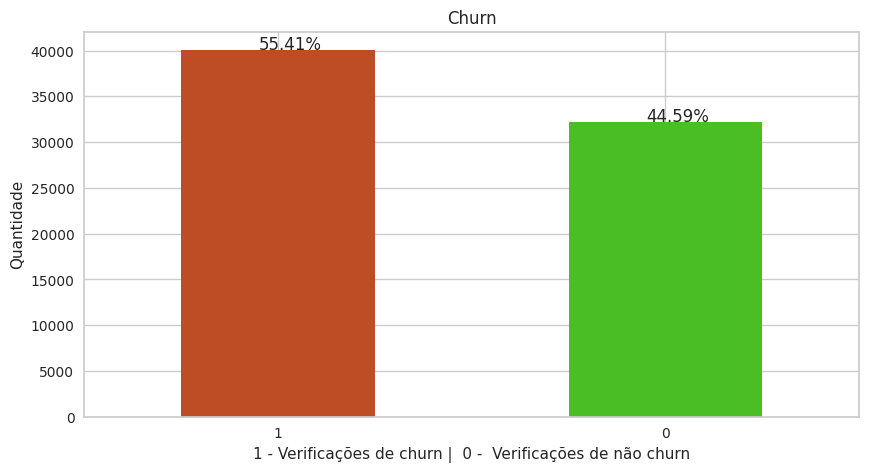

In [14]:
funcao.plot_churn(df)

In [8]:
classes=["Não Churn","Churn"]

In [9]:
model, data_train, data_test, target_train, target_test = funcao.good_model(df)

Modelo salvo como 'modelo_churn.pkl'


/home/merovingio/anaconda3/envs/mba_para_producao/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: G

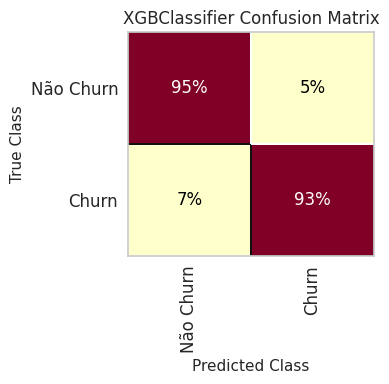

<Axes: title={'center': 'XGBClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [10]:
funcao.plotarMatrizConfusao(model,classes,data_train, data_test, target_train, target_test)

/home/merovingio/anaconda3/envs/mba_para_producao/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: G

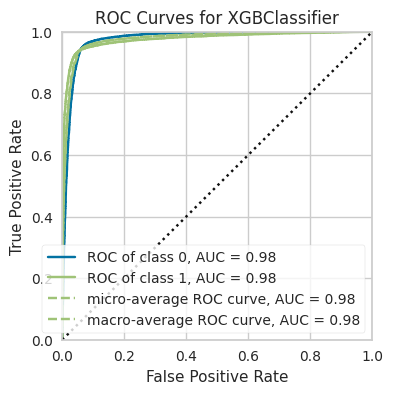

<Axes: title={'center': 'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [11]:
funcao.plotarCurvaROC(model, data_train, data_test, target_train, target_test)